In [1]:
import os
import sys
import math
import logging
from pathlib import Path

#import numpy as np
import scipy as sp
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={"figure.figsize": (16, 9.)})
sns.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.7 from "C:\Python\envs\medangel\python.exe"
  * The NumPy version is: "1.20.1"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed: The specified module could not be found.


In [2]:
from medangel.data import preprocessing

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


**PLEASE** save this file right now using the following naming convention: `NUMBER_FOR_SORTING-YOUR_INITIALS-SHORT_DESCRIPTION`, e.g. `1.0-fw-initial-data-exploration`. Use the number to order the file within the directory according to its usage.

In [3]:
from medangel.data import preprocessing
df = preprocessing.load_in_data()
df_clean = preprocessing.clean_data(df)
df_relevant = preprocessing.select_relevant_data(df_clean)


In [4]:
from medangel.features import feature_creation
extracted_features = feature_creation.extract_minimum_features(df_relevant)

Feature Extraction: 100%|██████████| 30/30 [00:03<00:00,  9.02it/s]


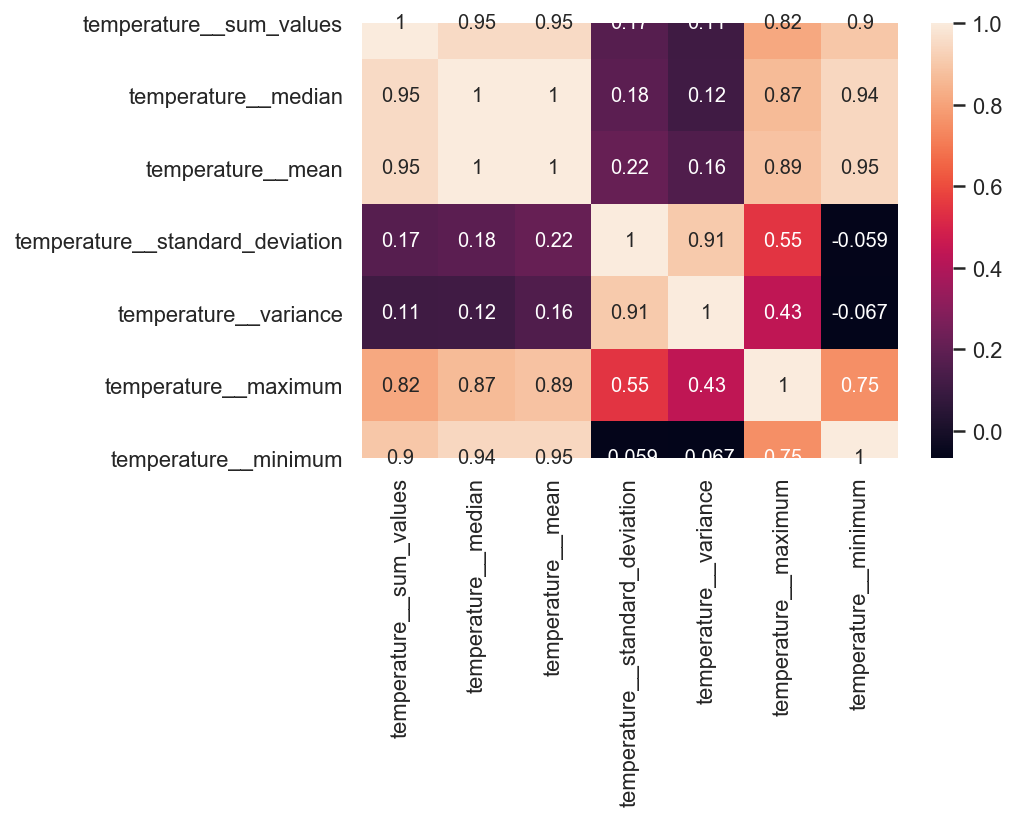

In [5]:
from medangel.visualization import viz_creation
viz_creation.create_heatmap(extracted_features)

Feature Extraction: 100%|██████████| 30/30 [00:02<00:00, 11.28it/s]


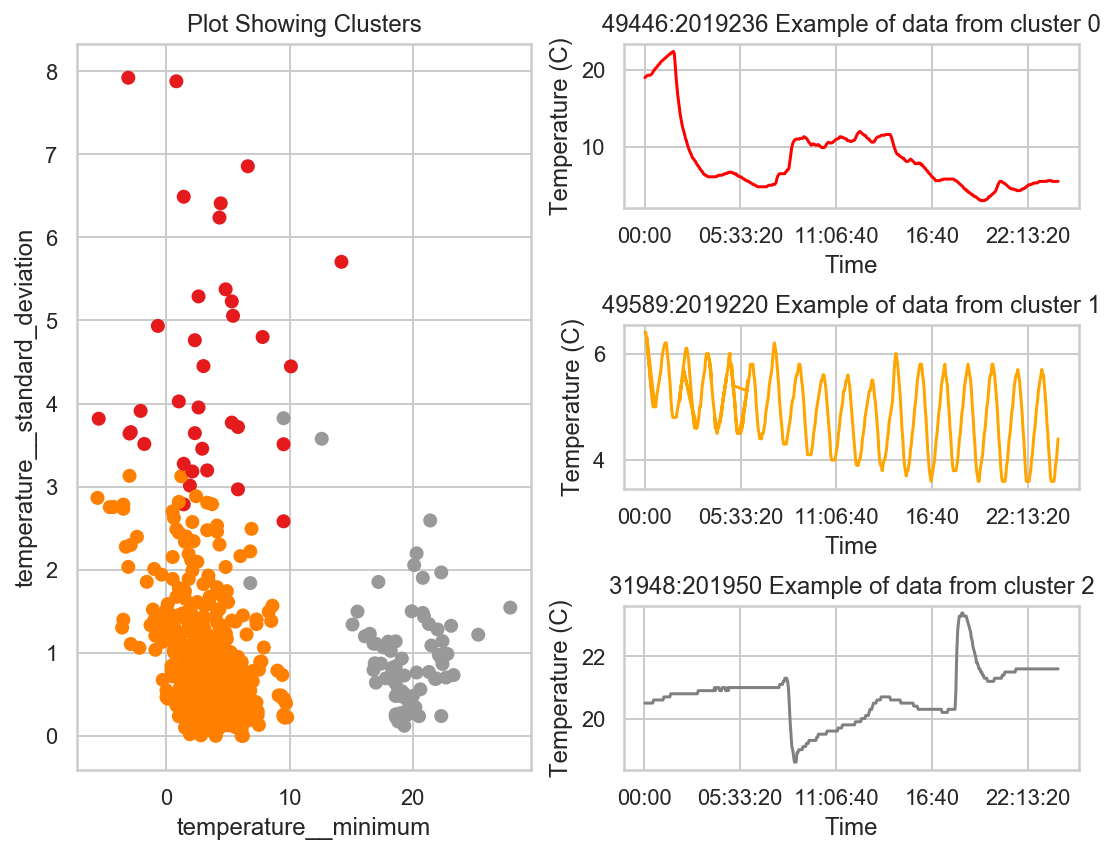

In [8]:
#check if grey and red clusters are from single fridge
#temperatures below 0 are bad
#assume: there is a critical minimum temperature for most medications (2C) 
#divide all temperatures by 2 and find log of that. You get a measure of how far the temperature has deviated from 
#this critical temp
#assume: there is a critical maximum temperature for most medications (8C)
#log will squish the tails and show outliers in central cluster (especially cluster 1)
#2 approaches: apply transformation to the features or apply tranformation to timeseries
#have a look at sklearn.preprocessing module and find a transformation that can stress "temp < 2"
#can we find transformation that creates new temperature range that streches everything outside the critical temperature
#range to identify problematic cases
#if we deviate 3 degrees below the minimum threshold, very critical, 3 degrees above maximum threshold is not as critical
#imbalance
#think about transformation function that reflects above observation
viz_creation.create_multiple_figure(df_relevant)

(array([492., 381., 119.,  35.,  22.,  19.,   7.,  12.,   3.,   3.,   4.,
          1.,   2.,   2.,   0.,   2.]),
 array([0.        , 0.49510268, 0.99020537, 1.48530805, 1.98041074,
        2.47551342, 2.97061611, 3.46571879, 3.96082148, 4.45592416,
        4.95102684, 5.44612953, 5.94123221, 6.4363349 , 6.93143758,
        7.42654027, 7.92164295]),
 <a list of 16 Patch objects>)

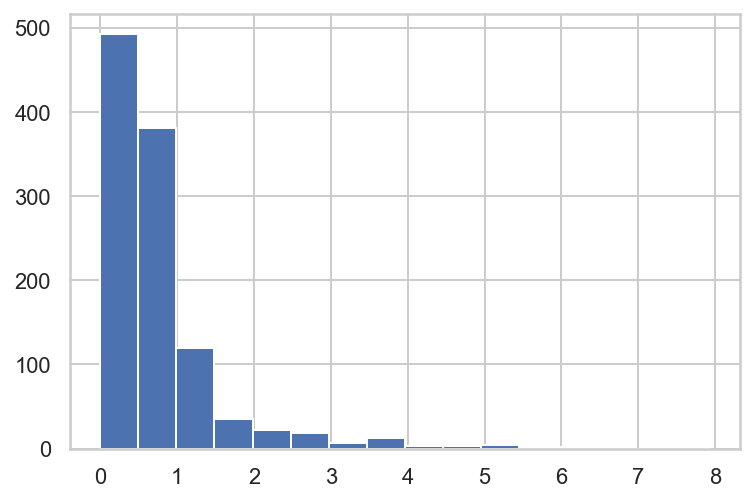

In [14]:
import matplotlib.pyplot as plt
plt.hist(extracted_features.temperature__standard_deviation, bins = int(80/5))

In [7]:
count_table = df_relevant.groupby("doy_id")["doy_id"].count()
drop_ids = count_table[count_table > 486].index
df_relevant = df_relevant[~df_relevant["doy_id"].isin(drop_ids)]
df_relevant.groupby("doy_id")["doy_id"].count()
count_table

doy_id
31948:2019100    482
31948:2019101    481
31948:2019102    483
31948:2019103    482
31948:2019104    483
                ... 
59519:202011     486
59519:202012     459
59519:202013     442
59519:202018     449
59519:202019     360
Name: doy_id, Length: 1104, dtype: int64